In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os   

In [2]:
df=pd.read_csv(r'D:\CarDekhoModel\notebooks\data\cardekho_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
df.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [ ]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
df['seats'].unique()

array([5, 8, 7, 6, 4, 2, 9, 0], dtype=int64)

In [ ]:
df.drop(['Unnamed: 0','selling_price'],axis=1,inplace=True)

## Data Check To Perform:-

* Check Missing Value.
* Check Duplicate Value.
* Check Data Type.
* Check the number of unique value of each column.
* Check Statistics of data set.
* Check various categories present in the different categories column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.4+ MB


In [ ]:
df[df['car_name']=='Volvo XC90']

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
3003,Volvo XC90,Volvo,XC90,6,80000,Individual,Diesel,Automatic,17.2,1969,235.0,7
7518,Volvo XC90,Volvo,XC90,3,33000,Dealer,Diesel,Automatic,17.2,1969,235.0,7
9975,Volvo XC90,Volvo,XC90,2,25500,Dealer,Diesel,Automatic,17.2,1969,235.0,7
10642,Volvo XC90,Volvo,XC90,5,85000,Dealer,Diesel,Automatic,17.2,1969,235.0,7


In [ ]:
df[df['car_name']=='Maserati Ghibli']

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
983,Maserati Ghibli,Maserati,Ghibli,5,15000,Dealer,Diesel,Automatic,20.41,2987,271.0,5


In [ ]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
dtype: int64

In [ ]:
df.shape

(15411, 12)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(13995, 12)

In [ ]:
df.dtypes

car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
dtype: object

* Date ahve no missing value.
* Data have some Duplicates records.
* Given data have `object` ,`float64`,`int64` data types columns.

In [ ]:
df['car_name'].unique()

array(['Maruti Alto', 'Hyundai Grand', 'Hyundai i20', 'Ford Ecosport',
       'Maruti Wagon R', 'Hyundai i10', 'Hyundai Venue', 'Maruti Swift',
       'Hyundai Verna', 'Renault Duster', 'Mini Cooper', 'Maruti Ciaz',
       'Mercedes-Benz C-Class', 'Toyota Innova', 'Maruti Baleno',
       'Maruti Swift Dzire', 'Volkswagen Vento', 'Hyundai Creta',
       'Honda City', 'Mahindra Bolero', 'Toyota Fortuner', 'Renault KWID',
       'Honda Amaze', 'Hyundai Santro', 'Mahindra XUV500',
       'Mahindra KUV100', 'Maruti Ignis', 'Datsun RediGO',
       'Mahindra Scorpio', 'Mahindra Marazzo', 'Ford Aspire', 'Ford Figo',
       'Maruti Vitara', 'Tata Tiago', 'Volkswagen Polo', 'Kia Seltos',
       'Maruti Celerio', 'Datsun GO', 'BMW 5', 'Honda CR-V',
       'Ford Endeavour', 'Mahindra KUV', 'Honda Jazz', 'BMW 3', 'Audi A4',
       'Tata Tigor', 'Maruti Ertiga', 'Tata Safari', 'Mahindra Thar',
       'Tata Hexa', 'Land Rover Rover', 'Maruti Eeco', 'Audi A6',
       'Mercedes-Benz E-Class', 'Audi Q7'

## Segrigating Numerical and Categorical Columns:

In [ ]:
Categorical_features=[feature for feature in df.columns if df[feature].dtype=="O"]
Numerical_features=[feature for feature in df.columns if df[feature].dtype!="O"]

In [ ]:
Categorical_features

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [ ]:
Numerical_features

['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

### No of uniq Value in each Categorical columns :-

In [ ]:
for i in list(Categorical_features):
    print(f'{i} columns have Unique Value...\n',df[i].unique(),'\n-----------------------------------\n')

car_name columns have Unique Value...
 ['Maruti Alto' 'Hyundai Grand' 'Hyundai i20' 'Ford Ecosport'
 'Maruti Wagon R' 'Hyundai i10' 'Hyundai Venue' 'Maruti Swift'
 'Hyundai Verna' 'Renault Duster' 'Mini Cooper' 'Maruti Ciaz'
 'Mercedes-Benz C-Class' 'Toyota Innova' 'Maruti Baleno'
 'Maruti Swift Dzire' 'Volkswagen Vento' 'Hyundai Creta' 'Honda City'
 'Mahindra Bolero' 'Toyota Fortuner' 'Renault KWID' 'Honda Amaze'
 'Hyundai Santro' 'Mahindra XUV500' 'Mahindra KUV100' 'Maruti Ignis'
 'Datsun RediGO' 'Mahindra Scorpio' 'Mahindra Marazzo' 'Ford Aspire'
 'Ford Figo' 'Maruti Vitara' 'Tata Tiago' 'Volkswagen Polo' 'Kia Seltos'
 'Maruti Celerio' 'Datsun GO' 'BMW 5' 'Honda CR-V' 'Ford Endeavour'
 'Mahindra KUV' 'Honda Jazz' 'BMW 3' 'Audi A4' 'Tata Tigor'
 'Maruti Ertiga' 'Tata Safari' 'Mahindra Thar' 'Tata Hexa'
 'Land Rover Rover' 'Maruti Eeco' 'Audi A6' 'Mercedes-Benz E-Class'
 'Audi Q7' 'BMW Z4' 'BMW 6' 'Jaguar XF' 'BMW X5' 'MG Hector' 'Honda Civic'
 'Isuzu D-Max' 'Porsche Cayenne' 'BMW X1'

## **No of unique model containing by diffrent brand**

In [20]:
for i in df['brand'].unique():
    print(f"'{i}'",'',df[df['brand']==i]['model'].unique(),',')

'Maruti'  ['Alto' 'Wagon R' 'Swift' 'Ciaz' 'Baleno' 'Swift Dzire' 'Ignis' 'Vitara'
 'Celerio' 'Ertiga' 'Eeco' 'Dzire VXI' 'XL6' 'S-Presso' 'Dzire LXI'
 'Dzire ZXI'] ,
'Hyundai'  ['Grand' 'i20' 'i10' 'Venue' 'Verna' 'Creta' 'Santro' 'Elantra' 'Aura'
 'Tucson'] ,
'Ford'  ['Ecosport' 'Aspire' 'Figo' 'Endeavour' 'Freestyle'] ,
'Renault'  ['Duster' 'KWID' 'Triber'] ,
'Mini'  ['Cooper'] ,
'Mercedes-Benz'  ['C-Class' 'E-Class' 'GL-Class' 'S-Class' 'CLS' 'GLS'] ,
'Toyota'  ['Innova' 'Fortuner' 'Camry' 'Yaris' 'Glanza'] ,
'Volkswagen'  ['Vento' 'Polo'] ,
'Honda'  ['City' 'Amaze' 'CR-V' 'Jazz' 'Civic' 'WR-V' 'CR'] ,
'Mahindra'  ['Bolero' 'XUV500' 'KUV100' 'Scorpio' 'Marazzo' 'KUV' 'Thar' 'XUV300'
 'Alturas'] ,
'Datsun'  ['RediGO' 'GO' 'redi-GO'] ,
'Tata'  ['Tiago' 'Tigor' 'Safari' 'Hexa' 'Nexon' 'Harrier' 'Altroz'] ,
'Kia'  ['Seltos' 'Carnival'] ,
'BMW'  ['5' '3' 'Z4' '6' 'X5' 'X1' '7' 'X3' 'X4'] ,
'Audi'  ['A4' 'A6' 'Q7' 'A8'] ,
'Land Rover'  ['Rover'] ,
'Jaguar'  ['XF' 'F-PACE' 'XE'] ,
'MG'  [

In [ ]:
Numerical_features

['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

### Statsitical analysis:

In [ ]:
df[Numerical_features].describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats
count,13995.00000,1.399500e+04,13995.000000,13995.000000,13995.000000,13995.000000
mean,6.06045,5.580548e+04,19.589478,1499.695320,101.747976,5.335334
std,3.02246,5.327096e+04,4.190269,528.279646,43.757138,0.819987
min,0.00000,1.000000e+02,4.000000,793.000000,38.400000,0.000000
25%,4.00000,3.000000e+04,16.950000,1197.000000,74.000000,5.000000
50%,6.00000,5.000000e+04,19.440000,1248.000000,88.500000,5.000000
75%,8.00000,7.032150e+04,22.540000,1591.000000,117.600000,5.000000
max,29.00000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000


In [ ]:
df[Categorical_features].describe()

,car_name,brand,model,seller_type,fuel_type,transmission_type
count,13995,13995,13995,13995,13995,13995
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,784,4402,784,9087,6903,10950


* Total 121 car presents into given 32 brands 
* Maximum Car are falling into `6.06045 age`.
* maximum car are `55805.477 Km` driven.

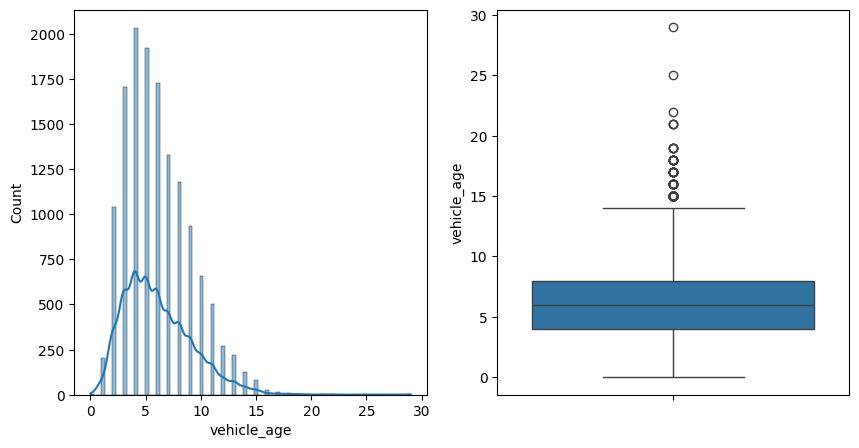

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['vehicle_age'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(df['vehicle_age'])
plt.show()

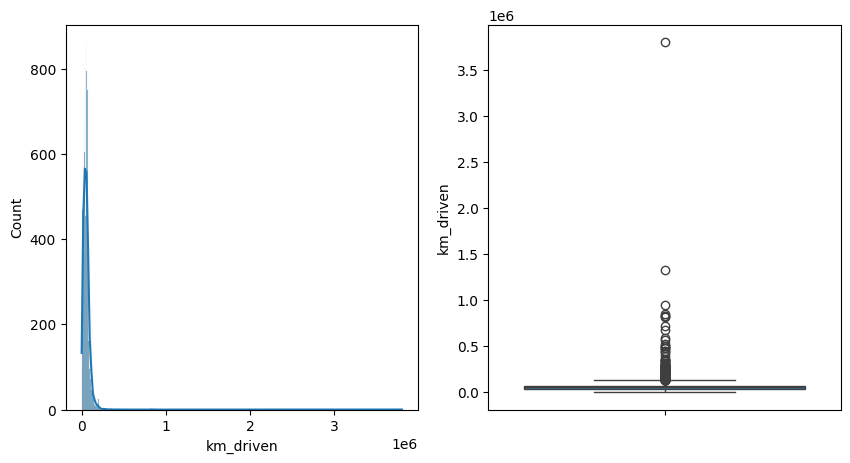

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['km_driven'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(df['km_driven'])
plt.show()

<Axes: xlabel='vehicle_age', ylabel='mileage'>

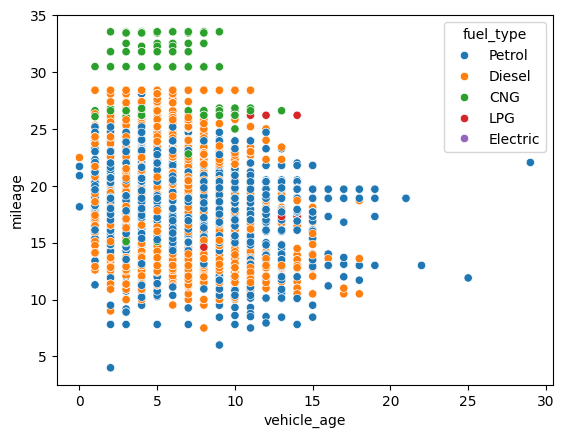

In [ ]:
sns.scatterplot(y=df['mileage'],x=df['vehicle_age'],hue=df['fuel_type'])

* maximum car `petrol` varients then Diesel varients

<Axes: xlabel='seats,fuel_type'>

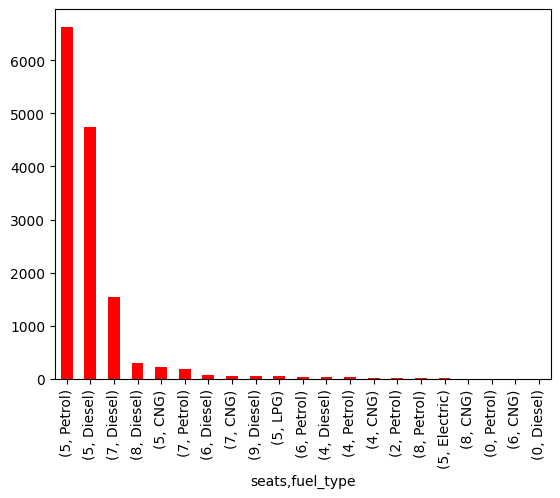

In [ ]:
df[['seats','fuel_type']].value_counts().plot(kind='bar',color='red')

In [ ]:
df[df['car_name']=='Ford Ecosport']

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
93,118,Ford Ecosport,Ford,Ecosport,4,55000,Dealer,Diesel,Manual,23.00,1498,98.96,5,685000
117,147,Ford Ecosport,Ford,Ecosport,3,55000,Individual,Diesel,Manual,23.00,1498,98.96,5,925000
166,221,Ford Ecosport,Ford,Ecosport,6,162828,Dealer,Diesel,Manual,22.77,1498,98.59,5,531000
167,222,Ford Ecosport,Ford,Ecosport,3,7500,Individual,Diesel,Manual,23.00,1498,98.96,5,890000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15279,19373,Ford Ecosport,Ford,Ecosport,2,14000,Dealer,Diesel,Manual,23.00,1498,98.96,5,1240000
15295,19393,Ford Ecosport,Ford,Ecosport,6,131100,Individual,Diesel,Manual,22.77,1498,98.59,5,600000
15356,19474,Ford Ecosport,Ford,Ecosport,6,46000,Individual,Petrol,Manual,15.85,1499,110.40,5,700000
15374,19499,Ford Ecosport,Ford,Ecosport,6,70000,Individual,Diesel,Manual,22.77,1498,98.59,5,740000


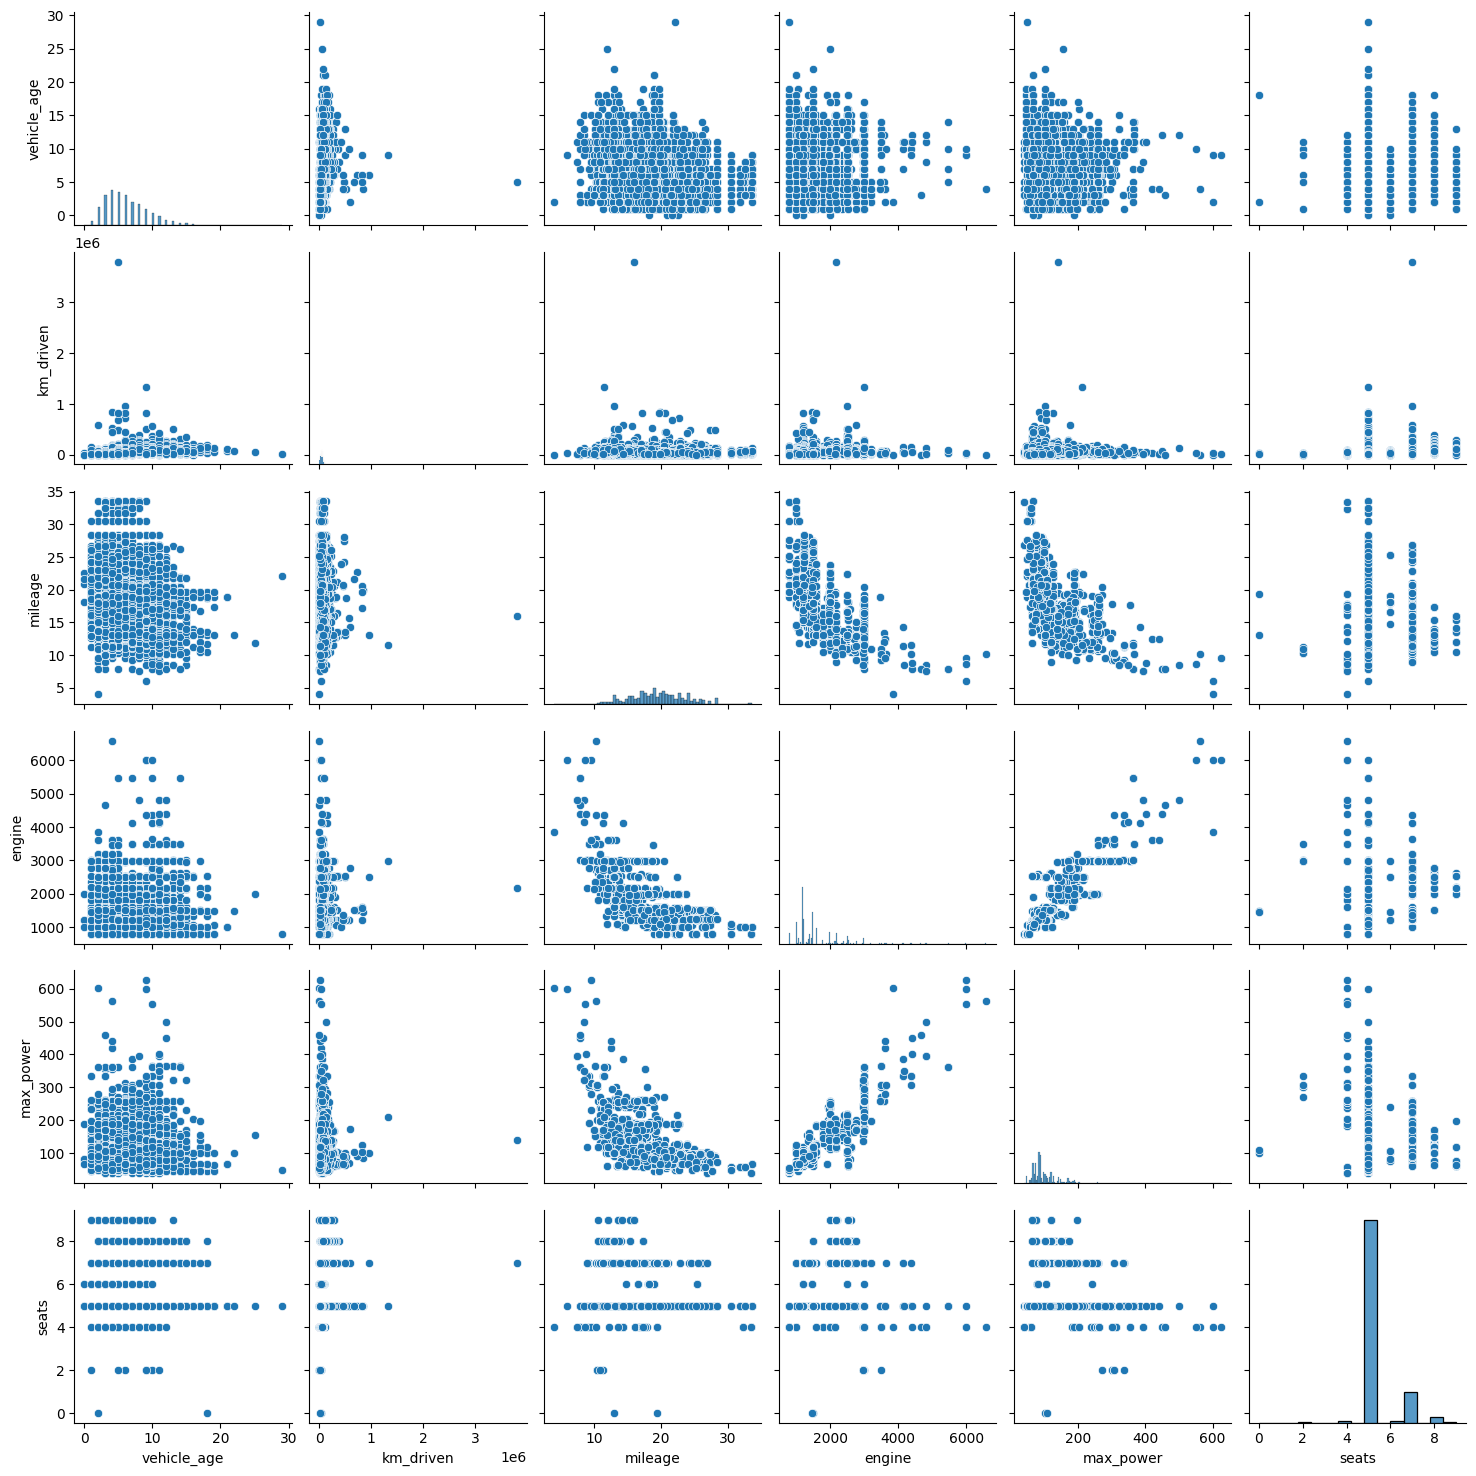

In [ ]:
sns.pairplot(df)

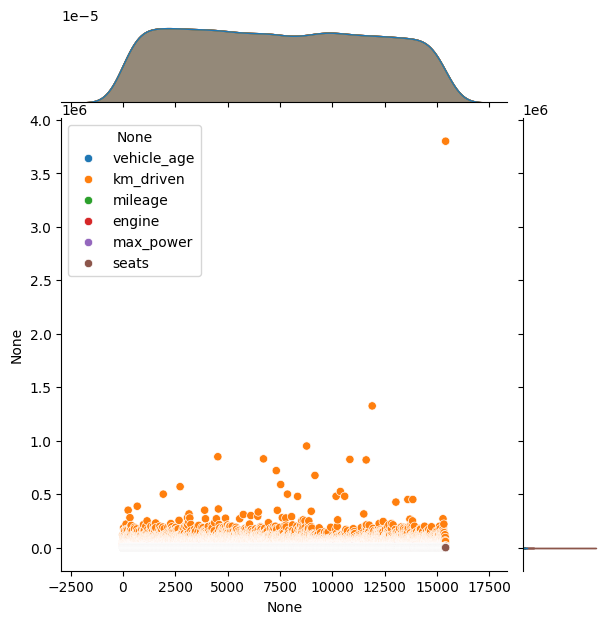

In [ ]:
sns.jointplot(df)

In [ ]:
df['car_name'].unique()

array(['Maruti Alto', 'Hyundai Grand', 'Hyundai i20', 'Ford Ecosport',
       'Maruti Wagon R', 'Hyundai i10', 'Hyundai Venue', 'Maruti Swift',
       'Hyundai Verna', 'Renault Duster', 'Mini Cooper', 'Maruti Ciaz',
       'Mercedes-Benz C-Class', 'Toyota Innova', 'Maruti Baleno',
       'Maruti Swift Dzire', 'Volkswagen Vento', 'Hyundai Creta',
       'Honda City', 'Mahindra Bolero', 'Toyota Fortuner', 'Renault KWID',
       'Honda Amaze', 'Hyundai Santro', 'Mahindra XUV500',
       'Mahindra KUV100', 'Maruti Ignis', 'Datsun RediGO',
       'Mahindra Scorpio', 'Mahindra Marazzo', 'Ford Aspire', 'Ford Figo',
       'Maruti Vitara', 'Tata Tiago', 'Volkswagen Polo', 'Kia Seltos',
       'Maruti Celerio', 'Datsun GO', 'BMW 5', 'Honda CR-V',
       'Ford Endeavour', 'Mahindra KUV', 'Honda Jazz', 'BMW 3', 'Audi A4',
       'Tata Tigor', 'Maruti Ertiga', 'Tata Safari', 'Mahindra Thar',
       'Tata Hexa', 'Land Rover Rover', 'Maruti Eeco', 'Audi A6',
       'Mercedes-Benz E-Class', 'Audi Q7'

## Fual type and seats value with respect to car_name value:-

In [21]:
for i in df['car_name'].unique():
    print(f"'{i}'",': (',df[df['car_name']==i]['fuel_type'].unique(), ',',df[df['car_name']==i]['seats'].unique(),'),')

'Maruti Alto' : ( ['Petrol' 'CNG'] , [5 4] ),
'Hyundai Grand' : ( ['Petrol' 'Diesel' 'CNG'] , [5] ),
'Hyundai i20' : ( ['Petrol' 'Diesel'] , [5] ),
'Ford Ecosport' : ( ['Diesel' 'Petrol'] , [5] ),
'Maruti Wagon R' : ( ['Petrol' 'CNG' 'LPG'] , [5] ),
'Hyundai i10' : ( ['Petrol' 'LPG'] , [5] ),
'Hyundai Venue' : ( ['Petrol' 'Diesel'] , [5] ),
'Maruti Swift' : ( ['Petrol' 'Diesel'] , [5] ),
'Hyundai Verna' : ( ['Diesel' 'Petrol'] , [5] ),
'Renault Duster' : ( ['Diesel' 'Petrol'] , [5] ),
'Mini Cooper' : ( ['Petrol' 'Diesel'] , [5 4] ),
'Maruti Ciaz' : ( ['Diesel' 'Petrol'] , [5] ),
'Mercedes-Benz C-Class' : ( ['Diesel' 'Petrol'] , [5] ),
'Toyota Innova' : ( ['Diesel' 'Petrol' 'CNG'] , [8 7] ),
'Maruti Baleno' : ( ['Petrol' 'Diesel'] , [5] ),
'Maruti Swift Dzire' : ( ['Petrol' 'Diesel' 'CNG'] , [5] ),
'Volkswagen Vento' : ( ['Petrol' 'Diesel'] , [5] ),
'Hyundai Creta' : ( ['Diesel' 'Petrol'] , [5] ),
'Honda City' : ( ['Petrol' 'Diesel' 'CNG'] , [5 0] ),
'Mahindra Bolero' : ( ['Diesel'] , [

In [ ]:
df[df['car_name']=='Rolls-Royce Ghost']

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
10969,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.2,6592,563.0,4


In [ ]:
df.groupby(['brand','fuel_type'])['km_driven'].mean()

brand       fuel_type
Audi        Diesel       59628.595092
            Petrol       49873.000000
BMW         Diesel       51355.384021
            Petrol       45472.232558
Bentley     Petrol       25500.000000
                             ...     
Toyota      Electric     64625.000000
            Petrol       53730.735294
Volkswagen  Diesel       73195.128472
            Petrol       52047.980066
Volvo       Diesel       61232.300000
Name: km_driven, Length: 61, dtype: float64